**UNZIPPING ZIP FILE DATASET**

In [ ]:
!unzip Dataset0.zip -d dataset0

Archive:  Dataset0.zip
   creating: dataset0/Dataset2/test/
  inflating: dataset0/Dataset2/test/71.JPG  
  inflating: dataset0/Dataset2/test/72.JPG  
  inflating: dataset0/Dataset2/test/73.JPG  
  inflating: dataset0/Dataset2/test/74.JPG  
  inflating: dataset0/Dataset2/test/75.JPG  
  inflating: dataset0/Dataset2/test/76.JPG  
  inflating: dataset0/Dataset2/test/77.JPG  
  inflating: dataset0/Dataset2/test/78.JPG  
  inflating: dataset0/Dataset2/test/79.JPG  
  inflating: dataset0/Dataset2/test/80.JPG  
  inflating: dataset0/Dataset2/test/81.JPG  
  inflating: dataset0/Dataset2/test/82.JPG  
  inflating: dataset0/Dataset2/test/83.JPG  
  inflating: dataset0/Dataset2/test/84.JPG  
  inflating: dataset0/Dataset2/test/85.JPG  
  inflating: dataset0/Dataset2/test/86.JPG  
  inflating: dataset0/Dataset2/test/87.JPG  
  inflating: dataset0/Dataset2/test/88.JPG  
  inflating: dataset0/Dataset2/test/89.JPG  
  inflating: dataset0/Dataset2/test/90.JPG  
  inflating: dataset0/Dataset2/test/91.J

In [ ]:
!unzip Dataset1.zip -d dataset1

Archive:  Dataset1.zip
   creating: dataset1/Dataset1/Acetylcysteine/
  inflating: dataset1/Dataset1/Acetylcysteine/1.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/10.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/11.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/12.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/13.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/14.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/15.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/16.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/17.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/18.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/19.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/2.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/20.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/21.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/22.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/23.JPG  
  inflating: dataset1/Dataset1/Acetylcysteine/24.JPG

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**IMPORTING LIBRARIES**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.image as mpimg
import os
import numpy as np
import pandas as pd
import random 
import seaborn as sns 

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from tensorflow.keras import layers
from keras.utils import np_utils
from keras import optimizers

import cv2
from keras.preprocessing.image import img_to_array, ImageDataGenerator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Flatten, Conv2D, Dropout, Dense, BatchNormalization

from pathlib import Path 
from collections import Counter

In [ ]:
batch_size = 10
img_height = 200
img_width = 200
downsample_factor = 4

**PREPROCESSING**

In [ ]:
dir_train = Path("dataset0/Dataset2/train/")
dir_test = Path("dataset0/Dataset2/test/")

**Data Splitting**

Number of images found: 490
Number of labels found: 490
Number of unique characters: 23
Characters present: {'f', '4', 'y', '2', '8', '9', '(', 'C', '3', '0', 'G', 'I', '_', '5', '6', ')', 'o', 'M', ' ', '-', '1', 'p', '7'}
Shape of image:  (1367, 1640, 3)
Shape of image:  (1234, 1629, 3)
Shape of image:  (1414, 1515, 3)
Shape of image:  (1414, 1515, 3)


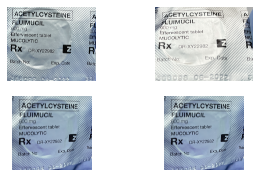

In [ ]:
images = sorted(list(map(str, list(dir_train.glob("*.JPG")))))
labels = [img.split(os.path.sep)[-1].split(".JPG")[0] for img in images]
characters = set(char for label in labels for char in label)

print(f"Number of images found: {len(images)}")
print(f"Number of labels found: {len(labels)}")
print(f"Number of unique characters: {len(characters)}")
print(f"Characters present: {characters}")

sample_images = images[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images[i]))
    print("Shape of image: ", img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

Number of images found: 210
Number of labels found: 210
Number of unique characters: 23
Characters present: {'f', '4', 'y', '2', '8', '9', '(', 'C', '3', '0', 'G', 'I', '_', '5', '6', ')', 'o', 'M', ' ', '-', '1', 'p', '7'}
Shape of image:  (1289, 1335, 3)
Shape of image:  (1289, 1335, 3)
Shape of image:  (1289, 1335, 3)
Shape of image:  (1289, 1335, 3)


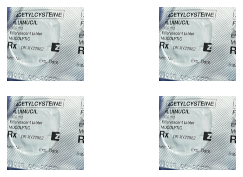

In [ ]:
images = sorted(list(map(str, list(dir_test.glob("*.JPG")))))
labels = [img.split(os.path.sep)[-1].split(".JPG")[0] for img in images]
characters = set(char for label in labels for char in label)

print(f"Number of images found: {len(images)}")
print(f"Number of labels found: {len(labels)}")
print(f"Number of unique characters: {len(characters)}")
print(f"Characters present: {characters}")

sample_images = images[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images[i]))
    print("Shape of image: ", img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

In [ ]:


def show_image(image, title='diff', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

In [ ]:
soaps_image = plt.imread('dataset0/Dataset2/train/Copy of Copy of IMG_3549(1).JPG')

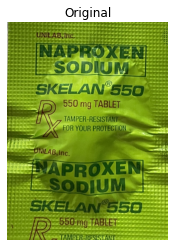

In [ ]:
from skimage import color
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# apply edge detection filters
edge_sobel = sobel(soaps_image_gray)

# Show original image
show_image(soaps_image, 'Original')

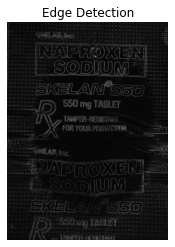

In [ ]:
show_image(edge_sobel, 'Edge Detection')

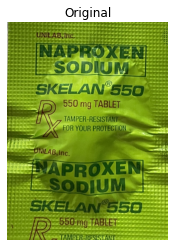

In [ ]:
from skimage.filters import gaussian

building_image = plt.imread('dataset0/Dataset2/train/Copy of Copy of IMG_3549(1).JPG')

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show the original image
show_image(building_image, 'Original')

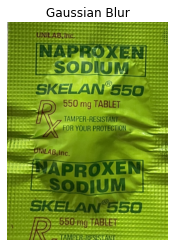

In [ ]:
show_image(gaussian_image, 'Gaussian Blur')

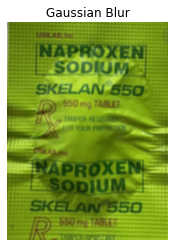

In [ ]:
from PIL import Image, ImageFilter
ImageFilter.GaussianBlur(radius=2)
from PIL import Image, ImageFilter

#Open existing image
OriImage = Image.open('dataset0/Dataset2/train/Copy of Copy of IMG_3549(1).JPG')
OriImage.show()

#Applying GaussianBlur filter
gaussImage = OriImage.filter(ImageFilter.GaussianBlur(5))
gaussImage.show()

#Save Gaussian Blur Image
gaussImage.save('dataset0/Dataset2/train/Copy of Copy of IMG_3549(1).JPG')
show_image(gaussImage, 'Gaussian Blur')

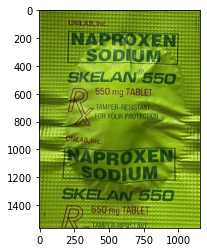

In [ ]:
import skimage.io
import matplotlib.pyplot as plt
import skimage.filters
#%matplotlib widget

image = skimage.io.imread(fname="dataset0/Dataset2/train/Copy of Copy of IMG_3549(1).JPG")

# display the image
fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

In [ ]:
sigma = 3.0

# apply Gaussian blur, creating a new image
blurred = skimage.filters.gaussian(
    image, sigma=(sigma, sigma), truncate=3.5, multichannel=True)

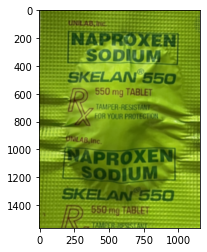

In [ ]:
# display blurred image
fig, ax = plt.subplots()
plt.imshow(blurred)
plt.show()

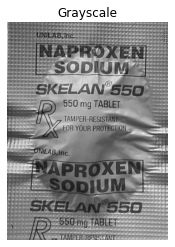

In [ ]:
show_image(soaps_image_gray, 'Grayscale')

**TRAINING AND TESTING OF DATASET**

In [ ]:
train_dir = 'dataset0/Dataset2/train/'
train_data = []
img_size = 32

count = 0
sub_directory = os.path.join(train_dir)
for j in os.listdir(sub_directory):
    count+=1
    if count > 500:
        break
    img = cv2.imread(os.path.join(sub_directory,j),0)
    img = cv2.resize(img,(img_size,img_size))
    train_data.append([img,i])

In [ ]:
len(train_data)

490

In [ ]:
test_dir = "dataset0/Dataset2/test/"
test_data = []
img_size = 32

count = 0
sub_directory = os.path.join(test_dir)
for j in os.listdir(sub_directory):
    count+=1
    if count > 500:
        break
    img = cv2.imread(os.path.join(sub_directory,j),0)
    img = cv2.resize(img,(img_size,img_size))
    test_data.append([img,i])

In [ ]:
len(test_data)

210

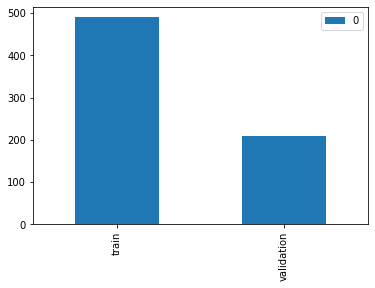

In [ ]:
pd.DataFrame((len(train_data),len(test_data)),
             index=('train','validation')
            ).plot.bar()
plt.show()

In [ ]:
random.shuffle(train_data)
random.shuffle(test_data)

In [ ]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)
test_X = []
test_Y = []
for features,label in test_data:
    test_X.append(features)
    test_Y.append(label)

LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
test_Y = LB.fit_transform(test_Y)

In [ ]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [ ]:
test_X = np.array(test_X)/255.0
test_X = test_X.reshape(-1,32,32,1)
test_Y = np.array(test_Y)

In [ ]:
print(train_X.shape,test_X.shape)

(490, 32, 32, 1) (210, 32, 32, 1)


In [ ]:
print(train_Y.shape,test_Y.shape)

(490, 1) (210, 1)


**MODEL**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_X,train_Y, 
                    epochs=50, batch_size=batch_size, 
                    validation_data = (test_X, test_Y),  
                    verbose=1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


49/49 [==============================] - 2s 34ms/step - loss: 0.2643 - accuracy: 0.9776 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
49/49 [==============================] - 1s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
49/49 [==============================] - 1s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
49/49 [==============================] - 1s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
49/49 [==============================] - 1s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
49/49 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
49/49 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000

In [ ]:
scores_train = model.evaluate(train_X, train_Y, verbose=1)
print('Train loss:', scores_train[0])
print('Train accuracy:', scores_train[1])

scores_test = model.evaluate(test_X, test_Y, verbose=1)
print('Validation loss:', scores_test[0])
print('Validation accuracy:', scores_test[1])

 4/16 [======>.......................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


16/16 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Train loss: 0.0
Train accuracy: 1.0
7/7 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Validation loss: 0.0
Validation accuracy: 1.0


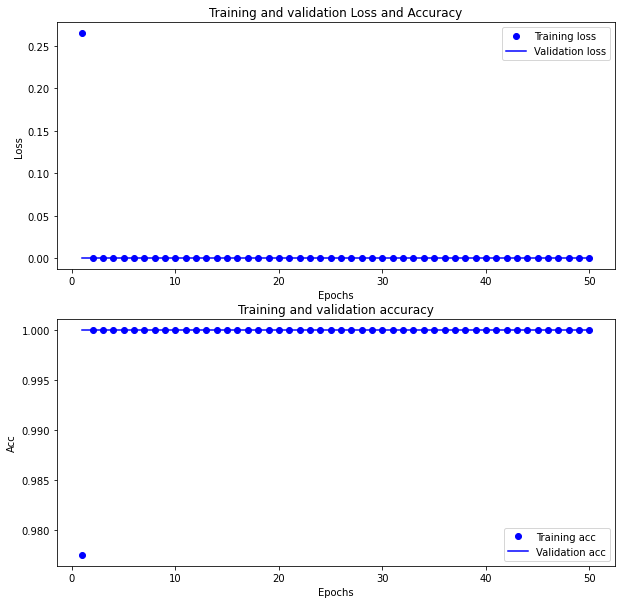

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

**DATA AUGMENTATION**

In [ ]:
IMG_SIZE = (200, 200)
VALID_SPLIT = 0.3
BATCH_SIZE = 10
SEED = 42
PATH = "drive/MyDrive/ASD/DatasetMeds/"

# Train image with generator
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=VALID_SPLIT,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Validation image with generator
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=VALID_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

Found 14019 files belonging to 14 classes.
Using 9814 files for training.
Found 14019 files belonging to 14 classes.
Using 4205 files for validation.


In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
])

# Apply transformation to train data
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
augmented_train_ds = augmented_train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [ ]:
classes = train_ds.class_names

**CLASSIFICATION**

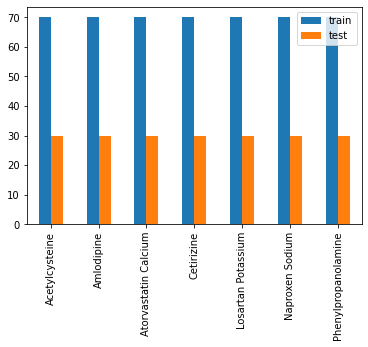

In [ ]:
import pandas as pd

pd.DataFrame({'train': 70,
                    'test': 30}, 
             index=classes
            ).plot.bar()
plt.show()

**CNN (ResNet50)**

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, MaxPool2D, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
 
import pandas as pd   
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
im_shape = (200,200)

TRAINING_DIR = 'drive/MyDrive/ASD/DatasetMeds/'
TEST_DIR = 'drive/MyDrive/ASD/DatasetMeds/'

seed = 10

BATCH_SIZE = 10

In [ ]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)

In [ ]:
data_generator = ImageDataGenerator(
        validation_split=0.3,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)

In [ ]:
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")

validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")


test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 9815 images belonging to 14 classes.
Found 4204 images belonging to 14 classes.
Found 14019 images belonging to 14 classes.
Classes: ['Acetylcysteine', 'Amlodipine', 'Ascorbic Acid', 'Atorvastatin Calcium', 'Cetirizine', 'Conzace', 'Losartan Potassium', 'Mefenamic Acid', 'Naproxen Sodium', 'Neurobion', 'Neuroforte-E', 'Phenylpropanolamine', 'Polynerve', 'Sodium Ascorbate']


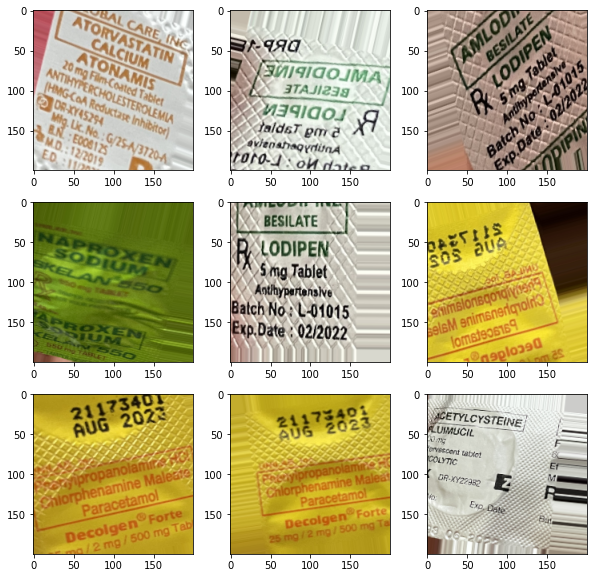

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
# cnn (resnet50)

def resnet50_model(classes=7, *args, **kwargs):

    # Create an input layer 
    input = keras.layers.Input(shape=(None, None, 3))
    # Create output layers
    output = keras.layers.ZeroPadding2D(padding=3, name='padding_conv1')(input)
    output = keras.layers.Conv2D(64, (7, 7), strides=(2, 2), use_bias=False, name='conv1')(output)
    output = keras.layers.BatchNormalization(axis=3, epsilon=1e-5, name='bn_conv1')(output)
    output = keras.layers.Activation('relu', name='conv1_relu')(output)
    output = keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='pool1')(output)
    output = conv_block(output, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    output = identity_block(output, 3, [64, 64, 256], stage=2, block='b')
    output = identity_block(output, 3, [64, 64, 256], stage=2, block='c')
    output = conv_block(output, 3, [128, 128, 512], stage=3, block='a')
    output = identity_block(output, 3, [128, 128, 512], stage=3, block='b')
    output = identity_block(output, 3, [128, 128, 512], stage=3, block='c')
    output = identity_block(output, 3, [128, 128, 512], stage=3, block='d')
    output = conv_block(output, 3, [256, 256, 1024], stage=4, block='a')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='b')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='c')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='d')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='e')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='f')
    output = conv_block(output, 3, [512, 512, 2048], stage=5, block='a')
    output = identity_block(output, 3, [512, 512, 2048], stage=5, block='b')
    output = identity_block(output, 3, [512, 512, 2048], stage=5, block='c')
    output = keras.layers.GlobalAveragePooling2D(name='pool5')(output)
    output = keras.layers.Dense(classes, activation='softmax', name='fc1000')(output)
    # Create a model from input layer and output layers
    model = keras.models.Model(inputs=input, outputs=output, *args, **kwargs)

    return model
# Create an identity block
def identity_block(input, kernel_size, filters, stage, block):
    
    # Variables
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    # Create layers
    output = keras.layers.Conv2D(filters1, (1, 1), kernel_initializer='he_normal', name=conv_name_base + '2a')(input)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2a')(output)
    output = keras.layers.Activation('relu')(output)
    output = keras.layers.Conv2D(filters2, kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name_base + '2b')(output)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2b')(output)
    output = keras.layers.Activation('relu')(output)
    output = keras.layers.Conv2D(filters3, (1, 1), kernel_initializer='he_normal', name=conv_name_base + '2c')(output)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2c')(output)
    output = keras.layers.add([output, input])
    output = keras.layers.Activation('relu')(output)
    # Return a block
    return output
# Create a convolution block
def conv_block(input, kernel_size, filters, stage, block, strides=(2, 2)):
    # Variables
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    # Create block layers
    output = keras.layers.Conv2D(filters1, (1, 1), strides=strides, kernel_initializer='he_normal', name=conv_name_base + '2a')(input)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2a')(output)
    output = keras.layers.Activation('relu')(output)
    output = keras.layers.Conv2D(filters2, kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name_base + '2b')(output)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2b')(output)
    output = keras.layers.Activation('relu')(output)
    output = keras.layers.Conv2D(filters3, (1, 1), kernel_initializer='he_normal', name=conv_name_base + '2c')(output)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2c')(output)
    shortcut = keras.layers.Conv2D(filters3, (1, 1), strides=strides, kernel_initializer='he_normal', name=conv_name_base + '1')(input)
    shortcut = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '1')(shortcut)
    output = keras.layers.add([output, shortcut])
    output = keras.layers.Activation('relu')(output)
    # Return a block
    return output

In [ ]:
model=resnet50_model()

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 padding_conv1 (ZeroPadding2D)  (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, None, None,   9408        ['padding_conv1[0][0]']          
                                64)                                                           

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
epochs = 50

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1)#,
    #keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/50


InvalidArgumentError: ignored

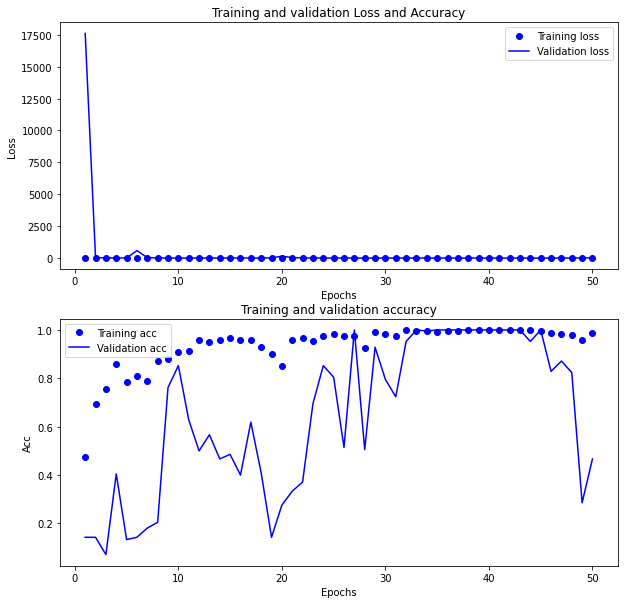

In [ ]:
# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
# Load the best saved model
from tensorflow.keras.models import load_model

model = load_model('model.h5')

In [ ]:
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])
score = model.evaluate_generator(test_generator)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Val loss: 5.102054274175316e-06
Val accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


Train loss: 4.135624294576701e-06
Train accuracy: 1.0


In [ ]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Classification Report
                      precision    recall  f1-score   support

      Acetylcysteine       1.00      1.00      1.00       100
          Amlodipine       1.00      1.00      1.00       100
Atorvastatin Calcium       1.00      1.00      1.00       100
          Cetirizine       1.00      1.00      1.00       100
  Losartan Potassium       1.00      1.00      1.00       100
     Naproxen Sodium       1.00      1.00      1.00       100
 Phenylpropanolamine       1.00      1.00      1.00       100

            accuracy                           1.00       700
           macro avg       1.00      1.00      1.00       700
        weighted avg       1.00      1.00      1.00       700



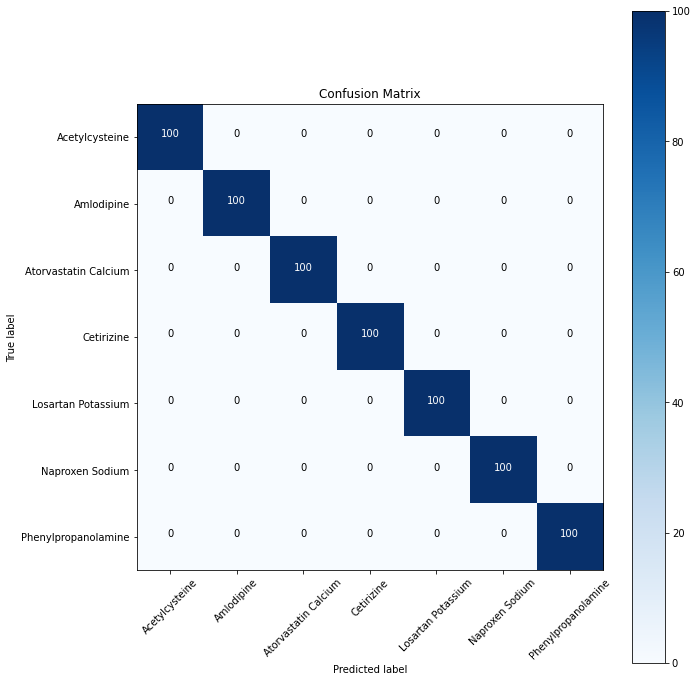

In [ ]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

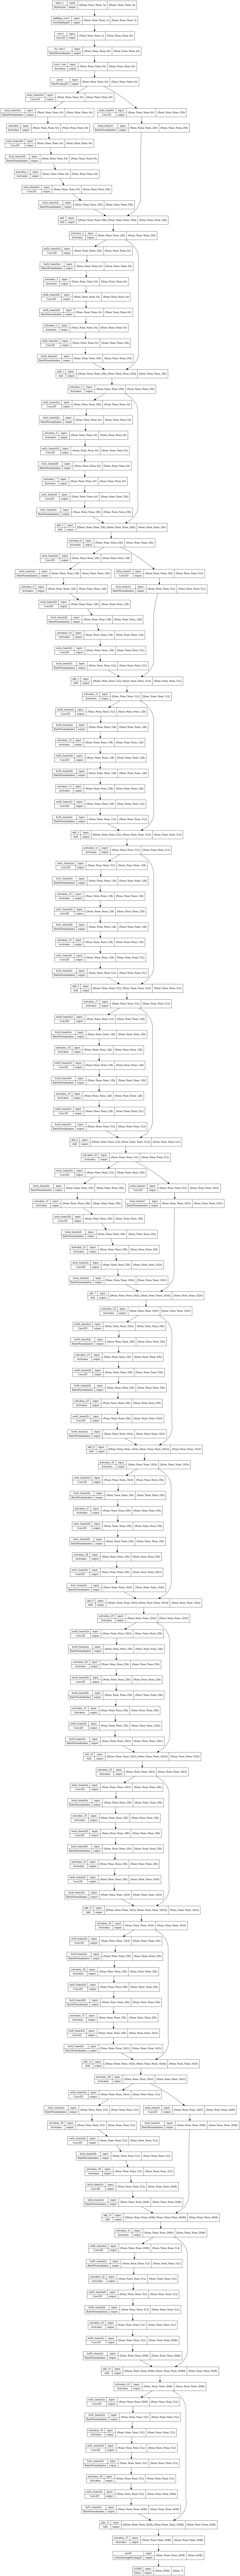

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**TEXT DETECTION AND RECOGNITION**

In [ ]:
import gc 
from IPython.display import clear_output
!pip install keras-ocr
#!pip install keras-ocr --user
clear_output()
import keras_ocr

In [ ]:
from pathlib import Path 
path = Path('dataset1/Dataset1/Naproxen Sodium/')
filepaths = list(path.glob(r'**/*.JPG'))
filepaths = filepaths[:20] 
gc.collect()

15067

In [ ]:
column_filepath = pd.Series(filepaths, name='image_path').astype(str)
train = pd.DataFrame(column_filepath)
train= train.sample(frac = 1).reset_index(drop=True)
train.head()

image_path
0     dataset1/Dataset1/Naproxen Sodium/IMG_3549.JPG
1  dataset1/Dataset1/Naproxen Sodium/Copy of IMG_...
2  dataset1/Dataset1/Naproxen Sodium/Copy of IMG_...
3  dataset1/Dataset1/Naproxen Sodium/Copy of IMG_...
4  dataset1/Dataset1/Naproxen Sodium/Copy of IMG_...

path= dataset1/Dataset1/Naproxen Sodium/IMG_3549.JPG
path= dataset1/Dataset1/Naproxen Sodium/Copy of IMG_3558(6).JPG
path= dataset1/Dataset1/Naproxen Sodium/Copy of IMG_3554(7).JPG
path= dataset1/Dataset1/Naproxen Sodium/Copy of IMG_3555(1).JPG
path= dataset1/Dataset1/Naproxen Sodium/Copy of IMG_3553(7).JPG
path= dataset1/Dataset1/Naproxen Sodium/Copy of IMG_3557(2).JPG


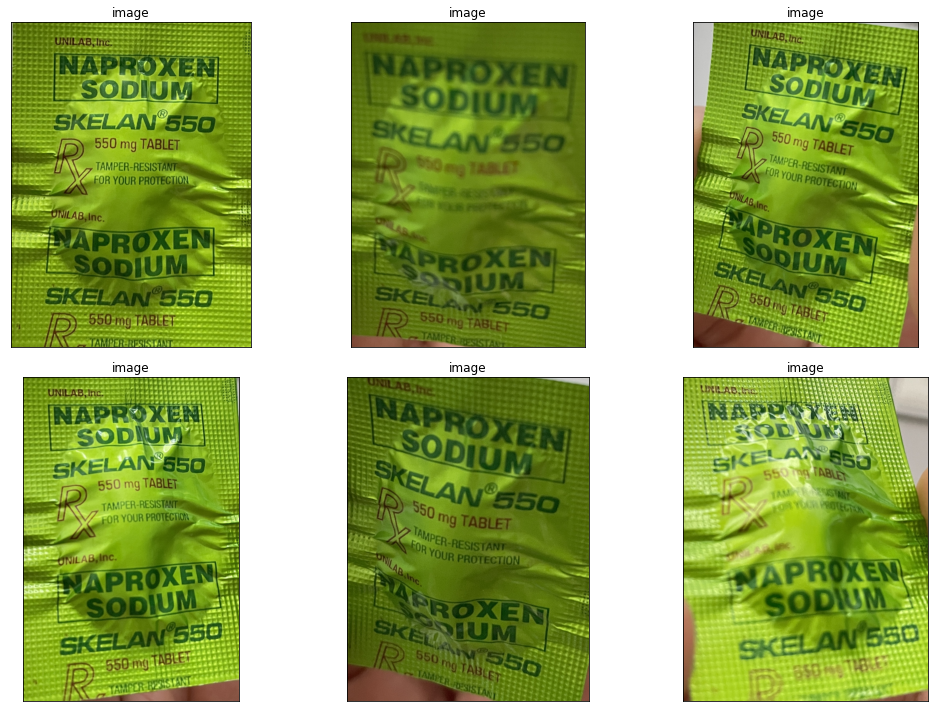

In [ ]:
f,a = plt.subplots(nrows=2, ncols=3,figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
    
for i, ax in enumerate(a.flat):

    path = train.iloc[i]["image_path"]
    print("path=",path)
    ax.imshow(keras_ocr.tools.read(path))
    ax.set_title("image")
    
plt.tight_layout()
plt.show()

In [ ]:
image_path_list = train[:3]["image_path"]
images = [ keras_ocr.tools.read(image_path) for image_path in image_path_list]

gc.collect()

8372

In [ ]:
!pip install matplotlib==3.3.0

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline() 
keras_ocr_preds = pipeline.recognize(images)

gc.collect()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


8702

10

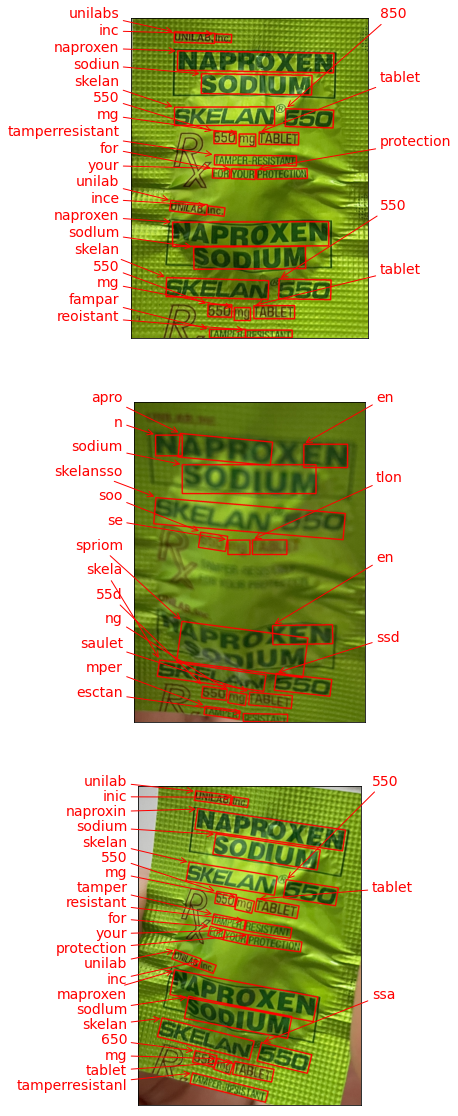

In [ ]:
fig,axs = plt.subplots(nrows = 3, figsize = (20,20))
for ax , image,  pred in zip(axs , images , keras_ocr_preds):
  #ax.title.set_text(f"This image may be {classes[5]}")
  keras_ocr.tools.drawAnnotations(image, pred, ax)
 
gc.collect()

In [ ]:
import imgaug
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import numpy as np
import zipfile
import datetime
import string
import math
import os

import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection
import cv2

import keras_ocr
import glob

In [ ]:
!pip install -U git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr
!pip install -U opencv-python # We need the most recent version of OpenCV.

  Cloning https://github.com/faustomorales/keras-ocr.git to /tmp/pip-install-o11y8c4v/keras-ocr_d446298146874b63955665ce91953f78
  Running command git clone -q https://github.com/faustomorales/keras-ocr.git /tmp/pip-install-o11y8c4v/keras-ocr_d446298146874b63955665ce91953f78
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for keras-ocr: filename=keras_ocr-0.9.0.post2+40bb9bd-py3-none-any.whl size=42441 sha256=395ed38f34cb967c37e2cf7ce5f322a5231d7070ae68addf74cc2ca4a5851340
  Stored in directory: /tmp/pip-ephem-wheel-cache-02584eqb/wheels/20/d0/06/ed290995144ec8dde71d3a91d0d590145445c01be60ea70c9b
Successfully built keras-ocr
  Attempting uninstall: keras-ocr
    Found existing installation: keras-ocr 0.9.1
    Uninstalling keras-ocr-0.9.1:
      Successfully uninstalled keras-ocr-0.9.1
     |████████████████████████████████| 60.5 MB 48 kB/s 
  Attempting uninstall: opencv-python
    Found exis

In [ ]:
!pip install --quiet google.colab
from google.colab.patches import cv2_imshow

In [ ]:
# model-recognizer

model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 198, 198, 20)      560       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 99, 99, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 97, 97, 40)        7240      
                                                                 
 flatten_28 (Flatten)        (None, 376360)            0         
                                                                 
 dense_56 (Dense)            (None, 100)               37636100  
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                     

In [ ]:
alphabet=list('aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!@#$%^&*()-_=+[{]}\\|;:\'\",<.>/?')

In [ ]:
recognizer = keras_ocr.recognition.Recognizer(
    alphabet=''.join(alphabet)
)
recognizer.compile(optimizer=RMSprop(centered=True))

Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for /root/.keras-ocr/crnn_kurapan_notop.h5


In [ ]:
recognizer.compile(optimizer='adam',
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                   metrics=['accuracy'])

In [ ]:
epochs=10

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience = 10, restore_best_weights=False),
    tf.keras.callbacks.ModelCheckpoint('recognizer_borndigital.h5', monitor='val_loss', save_best_only=True),
    tf.keras.callbacks.CSVLogger('recognizer_borndigital.csv')
]

recognizer = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/10
49/49 [==============================] - 46s 925ms/step - loss: 5.7374 - accuracy: 0.3837 - val_loss: 1.1428 - val_accuracy: 0.4762
Epoch 2/10
49/49 [==============================] - 50s 1s/step - loss: 1.0373 - accuracy: 0.5776 - val_loss: 1.1143 - val_accuracy: 0.6095
Epoch 3/10
49/49 [==============================] - 45s 910ms/step - loss: 0.8526 - accuracy: 0.6735 - val_loss: 0.6125 - val_accuracy: 0.8000
Epoch 4/10
49/49 [==============================] - 46s 935ms/step - loss: 0.7502 - accuracy: 0.7082 - val_loss: 0.3008 - val_accuracy: 0.9238
Epoch 5/10
49/49 [==============================] - 46s 926ms/step - loss: 0.6419 - accuracy: 0.7939 - val_loss: 0.2721 - val_accuracy: 0.9000
Epoch 6/10
49/49 [==============================] - 45s 914ms/step - loss: 0.6313 - accuracy: 0.7898 - val_loss: 0.2533 - val_accuracy: 0.9333
Epoch 7/10
49/49 [==============================] - 45s 906ms/step - loss: 0.5097 - accuracy: 0.8367 - val_loss: 0.2643 - val_accuracy: 0.9238
Ep

In [ ]:
score = model.evaluate_generator(test_generator)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Train loss: 0.29376712441444397
Train accuracy: 0.9342857003211975


In [ ]:
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Val loss: 0.027585556730628014
Val accuracy: 1.0


In [ ]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Classification Report
                      precision    recall  f1-score   support

      Acetylcysteine       1.00      1.00      1.00       100
          Amlodipine       1.00      1.00      1.00       100
Atorvastatin Calcium       1.00      1.00      1.00       100
          Cetirizine       1.00      1.00      1.00       100
  Losartan Potassium       1.00      1.00      1.00       100
     Naproxen Sodium       1.00      1.00      1.00       100
 Phenylpropanolamine       1.00      1.00      1.00       100

            accuracy                           1.00       700
           macro avg       1.00      1.00      1.00       700
        weighted avg       1.00      1.00      1.00       700



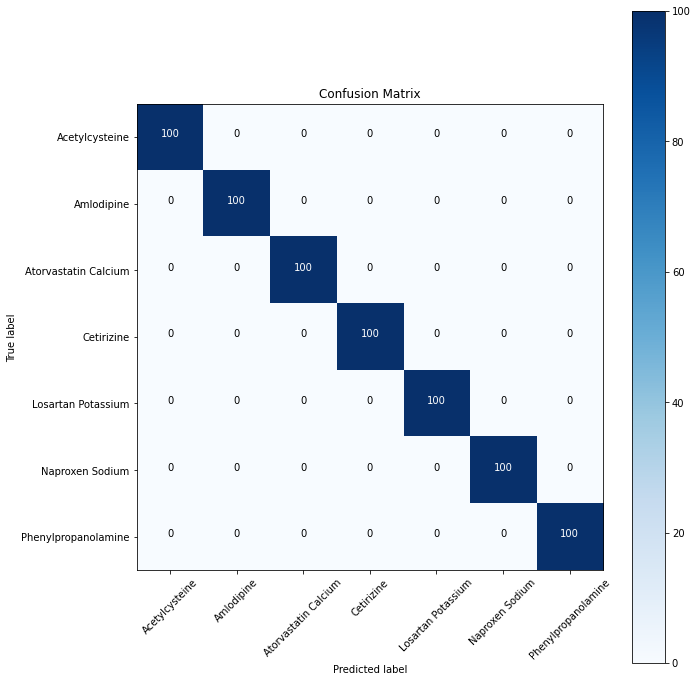

In [ ]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))